# Задание 4

В файле data.csv содержится табличка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data.csv")

Функция, которая считает интеграл переданной функции в заданном промежутке

In [2]:
def thousand_part_integral(left, right, func):
    steps = np.linspace(left, right, 1000)
    single_step = (right - left) / 1000
    vfunc = np.vectorize(func)
    arr = vfunc(steps)
    return arr.sum() * single_step

Просчет среднего значения отклонения для каждой строчки и общего количества валиков

In [3]:
data_total = data['num'].sum()
data['avg'] = (data['min'] + data['max']) / 2
print(data)

    min  max  num   avg
0   -30  -25    3 -27.5
1   -25  -20    8 -22.5
2   -20  -15   15 -17.5
3   -15  -10   35 -12.5
4   -10   -5   40  -7.5
5    -5    0   60  -2.5
6     0    5   55   2.5
7     5   10   30   7.5
8    10   15   25  12.5
9    15   20   14  17.5
10   20   25    8  22.5
11   25   30    7  27.5


Просчет вероятности того, что отклонение детали попадет в заданный промежуток для каждого ряда

In [4]:
data['p'] = data['num'] / data_total
print(data)

    min  max  num   avg         p
0   -30  -25    3 -27.5  0.010000
1   -25  -20    8 -22.5  0.026667
2   -20  -15   15 -17.5  0.050000
3   -15  -10   35 -12.5  0.116667
4   -10   -5   40  -7.5  0.133333
5    -5    0   60  -2.5  0.200000
6     0    5   55   2.5  0.183333
7     5   10   30   7.5  0.100000
8    10   15   25  12.5  0.083333
9    15   20   14  17.5  0.046667
10   20   25    8  22.5  0.026667
11   25   30    7  27.5  0.023333


Гистограмма

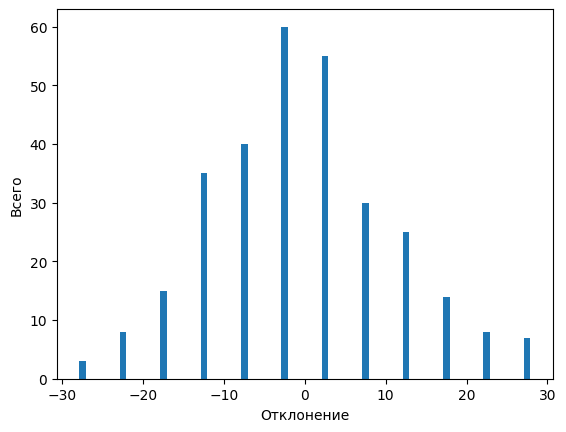

In [5]:
plt.bar(data['avg'], data['num'])
plt.xlabel("Отклонение")
plt.ylabel("Всего")
plt.show()

Мат ожидание

In [6]:
expected = (data['avg'] * data['p']).sum()
print(expected)

-0.4


Дисперсия

In [7]:
sigma = (data['p'] * (data['avg'] - expected) ** 2).sum() ** 0.5
print(sigma)

11.332401922511103


Доля изделий, для которых отклонение не превосходит 15 нм по абсолютной величине по таблице

In [8]:
under = data[abs(data["avg"]) < 15]
print(under["num"].sum()/data_total)

0.8166666666666667


Получение функции распределения

In [9]:
distribution = lambda x : np.e ** (-0.5 * ((x - expected) / sigma) ** 2) / \
                          (sigma * np.sqrt(2 * np.pi))

Получение вероятности того, что отклонение находится в промежутке [-15, 15]

In [10]:
print(thousand_part_integral(-15, 15, distribution))

0.8137284814382605
